In [1]:
## Import Dependencies
import os
import pandas as pd
import csv
import numpy as np

In [2]:
## Get data csv paths
aotizhongxin_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Changping_20130301-20170228.csv')
dingling_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Dingling_20130301-20170228.csv')
dongsi_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Guanyuan_20130301-20170228.csv')
gucheng_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Gucheng_20130301-20170228.csv')
huairou_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Huairou_20130301-20170228.csv')
nongzhanguan_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shunyi_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Shunyi_20130301-20170228.csv')
tiantan_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Tiantan_20130301-20170228.csv')
wanliu_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Wanliu_20130301-20170228.csv')
wanshouxigong_path = os.path.join(os.getcwd(), 'Resources', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [3]:
## load data into dataframes
aotizhongxin_df = pd.read_csv(aotizhongxin_path)
changping_df = pd.read_csv(changping_path)
dingling_df = pd.read_csv(dingling_path)
dongsi_df = pd.read_csv(dongsi_path)
guanyuan_df = pd.read_csv(guanyuan_path)
gucheng_df = pd.read_csv(gucheng_path)
huairou_df = pd.read_csv(huairou_path)
nongzhanguan_df = pd.read_csv(nongzhanguan_path)
shunyi_df = pd.read_csv(shunyi_path)
tiantan_df = pd.read_csv(tiantan_path)
wanliu_df = pd.read_csv(wanliu_path)
wanshouxigong_df = pd.read_csv(wanshouxigong_path)

In [4]:
## Take a peak
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
## concatonate all of our data to get a big dataframe
all_cities_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df])

In [6]:
all_cities_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [7]:
## Let's start looking at values for binning
all_cities_df['station'].value_counts()

Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: station, dtype: int64

In [8]:
## so 'station', 'pres', 'dewp', 'rain', 'No', 'WSPM' can be dropped

In [9]:
## Let's get a datetime column

In [10]:
all_cities_df['date'] = all_cities_df[['day', 'month', 'year']].apply(lambda x: '/'.join(x.map(str)), axis=1)

In [11]:
all_cities_df['date']

0         1/3/2013
1         1/3/2013
2         1/3/2013
3         1/3/2013
4         1/3/2013
           ...    
35059    28/2/2017
35060    28/2/2017
35061    28/2/2017
35062    28/2/2017
35063    28/2/2017
Name: date, Length: 420768, dtype: object

In [12]:
all_cities_df['date_hour'] = all_cities_df[['date', 'hour']].apply(lambda x: ' '.join(x.map(str)), axis=1)

In [13]:
all_cities_df['date_hour']

0          1/3/2013 0
1          1/3/2013 1
2          1/3/2013 2
3          1/3/2013 3
4          1/3/2013 4
             ...     
35059    28/2/2017 19
35060    28/2/2017 20
35061    28/2/2017 21
35062    28/2/2017 22
35063    28/2/2017 23
Name: date_hour, Length: 420768, dtype: object

In [14]:
all_cities_df['date_time'] = all_cities_df['date_hour'] + ":00"

In [15]:
all_cities_df['date_time']

0          1/3/2013 0:00
1          1/3/2013 1:00
2          1/3/2013 2:00
3          1/3/2013 3:00
4          1/3/2013 4:00
              ...       
35059    28/2/2017 19:00
35060    28/2/2017 20:00
35061    28/2/2017 21:00
35062    28/2/2017 22:00
35063    28/2/2017 23:00
Name: date_time, Length: 420768, dtype: object

In [16]:
## Now convert to datetime format
import datetime

In [17]:
all_cities_df['final_date_time'] = pd.to_datetime(all_cities_df['date_time'])

In [18]:
all_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   No               420768 non-null  int64         
 1   year             420768 non-null  int64         
 2   month            420768 non-null  int64         
 3   day              420768 non-null  int64         
 4   hour             420768 non-null  int64         
 5   PM2.5            412029 non-null  float64       
 6   PM10             414319 non-null  float64       
 7   SO2              411747 non-null  float64       
 8   NO2              408652 non-null  float64       
 9   CO               400067 non-null  float64       
 10  O3               407491 non-null  float64       
 11  TEMP             420370 non-null  float64       
 12  PRES             420375 non-null  float64       
 13  DEWP             420365 non-null  float64       
 14  RAIN             4203

In [19]:
## Now begin dropping

In [20]:
all_cities_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,PRES,DEWP,RAIN,wd,WSPM,station,date,date_hour,date_time,final_date_time
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,1/3/2013,1/3/2013 0,1/3/2013 0:00,2013-01-03 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,1/3/2013,1/3/2013 1,1/3/2013 1:00,2013-01-03 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,1/3/2013,1/3/2013 2,1/3/2013 2:00,2013-01-03 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,1/3/2013,1/3/2013 3,1/3/2013 3:00,2013-01-03 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,1/3/2013,1/3/2013 4,1/3/2013 4:00,2013-01-03 04:00:00


In [21]:
all_cities_df = all_cities_df.drop(columns = ['No', 'year', 'month', 'day', 'hour', 'wd', 'WSPM', 'station', 'date', 'date_hour', 'date_time'])
all_cities_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,final_date_time
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,2013-01-03 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,2013-01-03 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,2013-01-03 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,2013-01-03 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2013-01-03 04:00:00


In [22]:
all_cities_df = all_cities_df.rename(columns = {"final_date_time" : 'dt'})

In [23]:
all_cities_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,dt
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,2013-01-03 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,2013-01-03 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,2013-01-03 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,2013-01-03 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2013-01-03 04:00:00


In [24]:
all_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   PM2.5   412029 non-null  float64       
 1   PM10    414319 non-null  float64       
 2   SO2     411747 non-null  float64       
 3   NO2     408652 non-null  float64       
 4   CO      400067 non-null  float64       
 5   O3      407491 non-null  float64       
 6   TEMP    420370 non-null  float64       
 7   PRES    420375 non-null  float64       
 8   DEWP    420365 non-null  float64       
 9   RAIN    420378 non-null  float64       
 10  dt      420768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 38.5 MB


In [25]:
## now drop nulls
all_cities_df = all_cities_df.dropna()

In [26]:
all_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383586 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   PM2.5   383586 non-null  float64       
 1   PM10    383586 non-null  float64       
 2   SO2     383586 non-null  float64       
 3   NO2     383586 non-null  float64       
 4   CO      383586 non-null  float64       
 5   O3      383586 non-null  float64       
 6   TEMP    383586 non-null  float64       
 7   PRES    383586 non-null  float64       
 8   DEWP    383586 non-null  float64       
 9   RAIN    383586 non-null  float64       
 10  dt      383586 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 35.1 MB


In [27]:
## Now sort according to date
all_cities_df = all_cities_df.sort_values('dt')

In [28]:
all_cities_df.head(30)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,dt
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,2013-01-03 00:00:00
0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,2013-01-03 00:00:00
0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,2013-01-03 00:00:00
0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,2013-01-03 00:00:00
0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,2013-01-03 00:00:00
0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,2013-01-03 00:00:00
0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,2013-01-03 00:00:00
0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,2013-01-03 00:00:00
0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,2013-01-03 00:00:00
0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,2013-01-03 00:00:00


In [29]:
all_cities_df['dt'].unique()

array(['2013-01-03T00:00:00.000000000', '2013-01-03T01:00:00.000000000',
       '2013-01-03T02:00:00.000000000', ...,
       '2017-12-02T21:00:00.000000000', '2017-12-02T22:00:00.000000000',
       '2017-12-02T23:00:00.000000000'], dtype='datetime64[ns]')

In [30]:
all_cities_df.to_csv("Resources/all_city_data.csv")

## Ok so we are left with a GIGANTOR dataset with 383,595 data points... yikes

In [31]:
from matplotlib import pyplot as plt

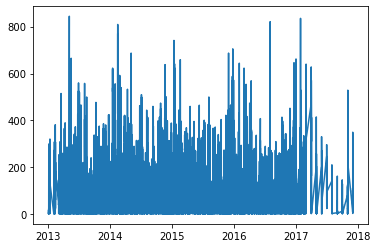

In [32]:
plt.plot(all_cities_df['dt'], all_cities_df['PM2.5'])

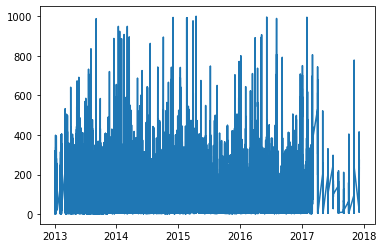

In [33]:
plt.plot(all_cities_df['dt'], all_cities_df['PM10'])

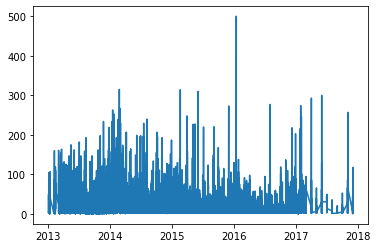

In [34]:
plt.plot(all_cities_df['dt'], all_cities_df['SO2'])

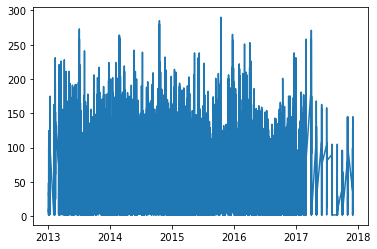

In [35]:
plt.plot(all_cities_df['dt'], all_cities_df['NO2'])

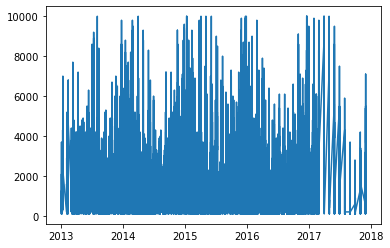

In [36]:
plt.plot(all_cities_df['dt'], all_cities_df['CO'])

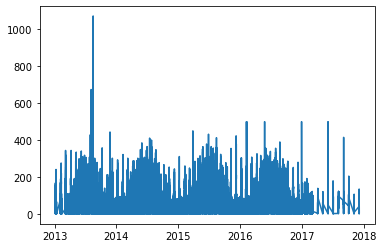

In [37]:
plt.plot(all_cities_df['dt'], all_cities_df['O3'])

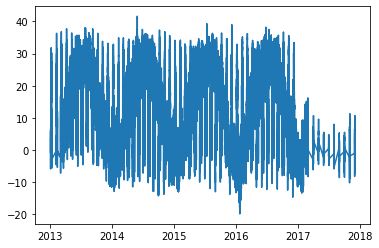

In [38]:
plt.plot(all_cities_df['dt'], all_cities_df['TEMP'])

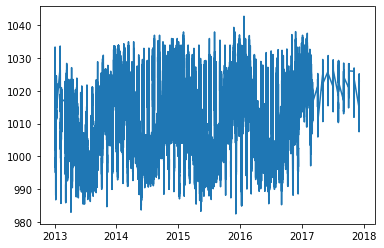

In [39]:
plt.plot(all_cities_df['dt'], all_cities_df['PRES'])

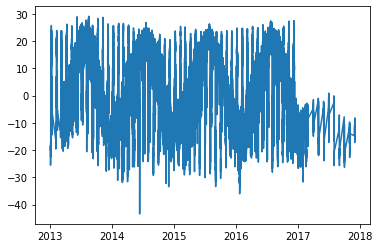

In [40]:
plt.plot(all_cities_df['dt'], all_cities_df['DEWP'])

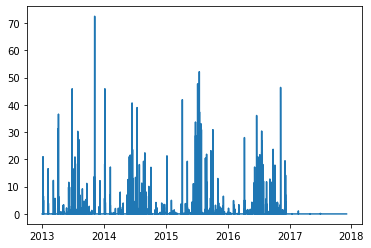

In [41]:
plt.plot(all_cities_df['dt'], all_cities_df['RAIN'])

In [42]:
## lets export our final csv
# all_cities_df.to_csv('Resources/all_city_data.csv')

In [16]:
from keras.models import load_model

# returns a compiled model identical to the previous one
model = load_model('Models/dewp_model.h5')

In [99]:
user_input = 10
predictions=[]
input_ary=np.array(grouped_df['PM10'][-365:].values)
# model.predict([[grouped_df['PM10'][-365:].values.reshape(-1, 1)]])
for each_t in range(user_input): 
    input_ary = input_ary[-365:]
    input_ary = np.reshape(input_ary, (1, 365, 1))
    prediction=model.predict(input_ary)
    predictions.append(prediction[0])
    print(prediction)
    input_ary=np.append(input_ary, prediction)
    # predictions.append(model.predict(input_ary))
    # predictions
    # current_ary=np.concatenate(input_ary[:-1], predictions[0])
    # current_ary

    # new_input


[[0.8393171]]
[[0.8543843]]
[[0.86457247]]
[[0.87243164]]
[[0.87995017]]
[[0.8882826]]
[[0.89798343]]
[[0.9092321]]
[[0.92198896]]
[[0.9360928]]


In [101]:
predictions[user_input-1]

array([0.9360928], dtype=float32)

In [61]:
df.head()

,PM2.5,dt,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
0,4.0,2013-01-03 00:00:00,-1.101254,-0.545907,-1.243556,-0.804110,0.348630,-1.242142,1.164563,-1.538262,-0.078906
1,9.0,2013-01-03 00:00:00,-1.046543,-0.592877,-0.958503,-0.804110,0.560363,-1.224639,1.308088,-1.726789,-0.078906
2,4.0,2013-01-03 00:00:00,-1.101254,-0.076203,-0.872987,-0.804110,0.207475,-1.242142,1.164563,-1.538262,-0.078906
3,7.0,2013-01-03 00:00:00,-1.068428,-0.592877,-1.386082,-0.976692,0.595652,-1.382164,0.906219,-1.676032,-0.078906
4,5.0,2013-01-03 00:00:00,-0.991832,-0.545907,-1.101029,-0.890401,0.489786,-1.224639,1.308088,-1.726789,-0.078906


In [12]:
model.predict([[[1], [1]], [[1], [1]]])

array([[0.9146795],
       [0.9146795]], dtype=float32)

In [6]:
import numpy as np
x_input = np.array([[[60], [70], [80], [90]]])
x_input=np.array(x_input)
x_input.shape
# x_input=np.reshape(x_input.shape[0], 365, 1)
# model.predict(x_input, verbose=0)

(1, 4, 1)

In [4]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

path = os.path.join(os.getcwd(), 'Resources', 'all_city_data.csv')
df = pd.read_csv(path)
df = df.drop(columns = {"Unnamed: 0"})
features = ["PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN"]
scalar = StandardScaler()
# the fit_transform ops returns a 2d numpy.array, we cast it to a pd.DataFrame
standardized_features = pd.DataFrame(scalar.fit_transform(df[features].copy()), columns = features)
old_shape = df.shape
# drop the unnormalized features from the dataframe
df.drop(features, axis = 1, inplace = True)
# join back the normalized features
df = pd.concat([df, standardized_features], axis= 1)
assert old_shape == df.shape, "something went wrong!"
df.head()

,PM2.5,dt,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
0,4.0,2013-01-03 00:00:00,-1.101254,-0.545907,-1.243556,-0.804110,0.348630,-1.242142,1.164563,-1.538262,-0.078906
1,9.0,2013-01-03 00:00:00,-1.046543,-0.592877,-0.958503,-0.804110,0.560363,-1.224639,1.308088,-1.726789,-0.078906
2,4.0,2013-01-03 00:00:00,-1.101254,-0.076203,-0.872987,-0.804110,0.207475,-1.242142,1.164563,-1.538262,-0.078906
3,7.0,2013-01-03 00:00:00,-1.068428,-0.592877,-1.386082,-0.976692,0.595652,-1.382164,0.906219,-1.676032,-0.078906
4,5.0,2013-01-03 00:00:00,-0.991832,-0.545907,-1.101029,-0.890401,0.489786,-1.224639,1.308088,-1.726789,-0.078906


In [7]:
grouped_df=df.groupby('dt').mean()
X_test = []
temp_arr=grouped_df['SO2'].values.reshape(-1, 1)
for i in range(365, len(temp_arr)): 
    X_test.append(temp_arr[i-365: i, 0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))